<b>Modules

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import gensim
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes  import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<b>Dataset

In [2]:
# Read the Dataset
dataset = pd.read_csv('ecommerceDataset.csv' , names = ['Category' , 'Description'] , header = None)

# Display the Data
dataset.head(2)

,Category,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."


In [3]:
# Display the Shape of the Dataset
print('The Shape of the Dataset is : {}'.format(dataset.shape))

The Shape of the Dataset is : (50425, 2)


In [4]:
# Check the Missing Values in the Dataset
nanValues = dataset.isnull().sum()
print(nanValues)

Category       0
Description    1
dtype: int64


In [5]:
# Drop the Missing Values in the Dataset
dataset.dropna(inplace = True)

# Display the Shape of the Dataset after drop the Missing Values
print('The Shape of the Dataset is : {}'.format(dataset.shape))

The Shape of the Dataset is : (50424, 2)


In [6]:
# Check the Duplicated Row in the Dataset
dupRow = dataset.duplicated().sum()
print('Total Duplicated Row in the Dataset is : {}'.format(dupRow))

Total Duplicated Row in the Dataset is : 22622


In [7]:
# Drop the Duplicated Row from Dataset
dataset.drop_duplicates(inplace = True)

# Display the Shape of the Dataset after drop the Missing Values
print('The Shape of the Dataset is : {}'.format(dataset.shape))

The Shape of the Dataset is : (27802, 2)


In [8]:
# Find out the Total Count of Each Class Label
labelCount = dataset['Category'].value_counts()
print(labelCount)

Household                 10564
Books                      6256
Clothing & Accessories     5674
Electronics                5308
Name: Category, dtype: int64


<b>Text Preprocessing

In [9]:
# Load the Spacy Pre-Trained Small Model
nlp = spacy.load('en_core_web_sm')

In [10]:
def textPreprocessing(text):
    doc = nlp(text)
    filterTokens = []
    for token in doc:
        if token.like_num or token.is_stop or token.is_punct:
            continue
        filterTokens.append(token.lemma_.lower())
    return filterTokens

In [11]:
# Now Map the Text Preprocessing function in Descritpion Columns
dataset['cleanDes'] = dataset['Description'].map(textPreprocessing)

<b>Implementation Word2Vec own Dataset

In [12]:
# Create the Corpus 
Corpus = list(dataset['cleanDes'])

In [13]:
# Create the Model of Word2Vec
model = gensim.models.Word2Vec(
    window = 10,
    min_count = 2,
    workers = 4
)

In [14]:
# Create the Vocabulary
model.build_vocab(Corpus)

In [15]:
# Train the Word2Vec Model
model.train(Corpus , total_examples = model.corpus_count , epochs = model.epochs)

(9460887, 9818750)

In [16]:
# Get the Total Unique Words
unqWords = model.wv.index_to_key
print('Total Unique Words is : {}'.format(len(unqWords)))

Total Unique Words is : 42818


In [17]:
# Display the All Unique Words
print(model.wv.index_to_key)

['design', 'book', 'product', ' ', 'set', 'use', 'size', 'x', 'high', 'easy', 'quality', 'color', 'good', 'author', 'home', '  ', 'black', 'time', 'look', 'new', 'cotton', 'come', 'power', 'material', 'light', 'work', '\xa0', 'feature', 'make', 'perfect', 'provide', 'inch', 'include', 'long', 'mm', 'year', 'wear', 'cm', 'fit', 'life', 'steel', 'water', 'style', 'usb', 'need', 'help', 'great', 'white', 'free', 'cover', 'like', 'world', 'fabric', 'soft', 'table', 'colour', 'camera', 'clean', 'hand', 'pack', 'device', 'brand', 'range', 'women', 'kitchen', 'stainless', 'day', 'support', 'room', 'way', 'cable', 'wall', 'lead', 'plastic', 'piece', 'glass', 'india', 'finish', 'offer', 'give', 'system', 'comfortable', 'type', 'comfort', 'experience', 'ensure', 'blue', 'phone', 'easily', 'air', 'place', '|', 'package', 'allow', 'review', 'different', 'storage', 'card', 'add', 'case', 'battery', 'car', 'weight', 'durable', 'stylish', 'food', 'small', 'dry', 'body', 'bluetooth', 'technology', 'co

In [18]:
# Display the All Word Vectors in the 2-D Numpy Array
allVector = model.wv.get_normed_vectors()
print(allVector)

[[-0.13578084  0.18144785  0.06576814 ... -0.07896531 -0.03771525
  -0.02165032]
 [ 0.132589    0.01769659 -0.00131625 ...  0.01578191  0.23255807
   0.12238597]
 [-0.1267547   0.17276914 -0.06634313 ... -0.05195114  0.15907255
  -0.19380973]
 ...
 [ 0.04521766  0.01733644 -0.03807095 ...  0.06597597  0.10898571
   0.10281152]
 [ 0.12053078 -0.07980313  0.0830603  ...  0.09662047 -0.22543576
   0.08185688]
 [ 0.10577736  0.01779097 -0.11928487 ...  0.16250247  0.13277726
   0.16155677]]


In [19]:
# Get the Similar Words
model.wv.most_similar('book')

[('write', 0.7670237421989441),
 ('illustrate', 0.7331067323684692),
 ('writing', 0.709115207195282),
 ('bible', 0.7057415843009949),
 ('interested', 0.6858552694320679),
 ('essay', 0.682498037815094),
 ('readable', 0.681209921836853),
 ('authoritative', 0.6768319010734558),
 ('lucid', 0.6766952872276306),
 ('richer', 0.6759521961212158)]

In [20]:
# Get the Similarity Between 2 Words
model.wv.similarity(w1 = 'book' , w2 = 'effect')

0.026613595

In [21]:
# Get the Similarity Between 2 Words
model.wv.similarity(w1 = 'book' , w2 = 'write')

0.7670238

In [31]:
# Get the Vectors of Spacific Word
loveVector = model.wv.get_vector('love')
print(loveVector)

[ 2.3582442  -0.9528275  -0.27288586  2.2755265   1.7213398  -0.8816682
  0.55401963  0.0921254   1.6971656   2.9944208  -0.83136994 -0.1107737
 -3.0907118  -1.8034538   0.2070413   2.466944    2.3694482  -0.9870184
 -0.6085808  -0.81202465  0.74713284 -1.9977168  -0.10421269 -0.62911475
 -0.19066313 -2.0395024   1.2949296  -0.10044061  2.7505462  -0.1606735
 -0.84206754  0.88749915 -2.4454708   2.2590995   2.055734    0.61366713
  1.7234906   2.6853573   0.77167076 -0.9018242  -0.11279079  0.49641216
 -1.0251219   1.9362241   1.1835307   2.1470034  -2.46509    -0.17010088
 -0.05828648 -0.48609895 -0.91295797  1.667096   -0.24792978  1.8729712
 -0.6010852  -0.4800717  -0.3782712  -0.7022657  -3.0467198   0.41732335
 -1.4145312  -0.28260285 -1.3689924  -1.05506     0.87364674  0.46424332
  1.2618631  -0.78268164 -1.1866276   0.6457084  -1.1748939  -1.2717594
 -1.2875286   1.077972   -1.497347   -1.1476839   1.8073088   2.2052808
 -0.4139656  -0.82443196 -1.7310216   0.46245223  1.324352

In [32]:
# Display the Shape of the Word Vector
print('The Shape of the Word Vector is : {}'.format(loveVector.shape))

The Shape of the Word Vector is : (100,)


<b>Implementation AvgWord2Vec

In [39]:
# Implementation of AvgWord2Vec
def avgWord2Vec(text):
    return (np.mean([model.wv.get_vector(word) for word in text if word in model.wv.index_to_key] , axis = 0))

In [40]:
# Now Convert the Each Row Data into Vector
Vectors = []
for index in tqdm(range(0,len(Corpus))):
    Vectors.append(avgWord2Vec(Corpus[index]))

100%|████████████████████████████████████████████████████████████████████████████| 27802/27802 [05:39<00:00, 81.88it/s]


In [44]:
# Check the Sentence Vectors
for index in range(0,len(Vectors)):
    if str(Vectors[index].shape) == '()':
        Vectors[index] = Vectors[index + 1]

<b>Convert Data into Dependent & Independent Matrix

In [48]:
# Now Convert the List into Numpy Array
X = np.array(Vectors)   # Independent Matrxi
Y = dataset.iloc[:,0].values # Dependent Matrix

# Display the Shape of the X Matrix 
print('The Shape of the X Matrix is : {}'.format(X.shape))
print('The Shape of the Y Matrix is : {}'.format(Y.shape))

The Shape of the X Matrix is : (27802, 100)
The Shape of the Y Matrix is : (27802,)


In [50]:
# Convert the Categorical Data into Numerical Data
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [51]:
# Normalize the Vectors
normalize = MinMaxScaler()
X = normalize.fit_transform(X)

<b>Split The Dataset into Training & Testing

In [53]:
# Split the Data into Training & Testing
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.25 , random_state = 0)

# Display the Shape of Train & Test Data
print('The Shape of the X Train is : {}'.format(x_train.shape))
print('The Shape of the Y Train is : {}'.format(y_train.shape))
print('The Shape of the X Test  is : {}'.format(x_test.shape))
print('The Shape of the Y Test  is : {}'.format(y_test.shape))

The Shape of the X Train is : (20851, 100)
The Shape of the Y Train is : (20851,)
The Shape of the X Test  is : (6951, 100)
The Shape of the Y Test  is : (6951,)


<b>Machine Learning Models

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score of the LR is : 0.9031793986476766



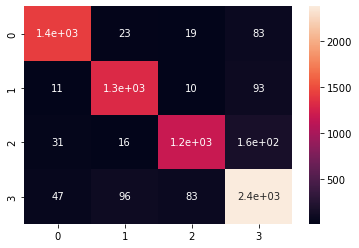

In [55]:
# Model 1 (Logistic Regrssion)
modelLR = LogisticRegression()
modelLR.fit(x_train , y_train)

# Now Predict the Results
y_predLR = modelLR.predict(x_test)

# Calculate the Accuracy Score of the LR Model
accLR = accuracy_score(y_test , y_predLR)
# Display the Accuracy Score of LR
print('Accuracy Score of the LR is : {}\n'.format(accLR))

# Calculate the Confusion Matrix of the LR Model
confLR = confusion_matrix(y_test , y_predLR)
# Display the Confusion Matrix
sns.heatmap(confLR , annot = True)
plt.show()

Accuracy Score of the NB is : 0.6222126312760754



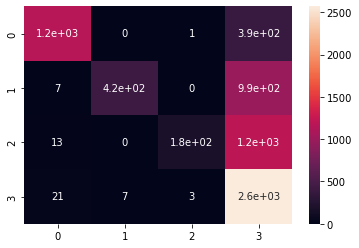

In [56]:
# Model 2 (MultinomialNB)
modelNB = MultinomialNB()
modelNB.fit(x_train , y_train)

# Now Predict the Results
y_predNB = modelNB.predict(x_test)

# Calculate the Accuracy Score of the NB Model
accNB = accuracy_score(y_test , y_predNB)
# Display the Accuracy Score of NB
print('Accuracy Score of the NB is : {}\n'.format(accNB))

# Calculate the Confusion Matrix of the NB Model
confNB = confusion_matrix(y_test , y_predNB)
# Display the Confusion Matrix
sns.heatmap(confNB , annot = True)
plt.show()